In [457]:
## Bollinger Bands Tutorials:
## https://www.youtube.com/watch?v=8PzQSgw0SpM
## https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands#:~:text=Bollinger%20Bands%20are%20envelopes%20plotted,Period%20and%20Standard%20Deviations%2C%20StdDev
## https://www.investopedia.com/terms/b/bollingerbands.asp

## Importing all the necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [458]:
## Download historical data for a particular stock

df = yf.download('SBIN.NS', period='1d', interval='1m')


[*********************100%***********************]  1 of 1 completed


In [459]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-13 09:15:00+05:30,528.349976,530.000000,528.150024,529.900024,529.900024,0
2023-04-13 09:16:00+05:30,529.900024,529.900024,528.799988,529.900024,529.900024,214017
2023-04-13 09:17:00+05:30,529.849976,530.400024,528.650024,528.700012,528.700012,174547
2023-04-13 09:18:00+05:30,528.700012,528.950012,527.799988,528.250000,528.250000,257203
2023-04-13 09:19:00+05:30,527.950012,528.599976,527.750000,528.049988,528.049988,126197
...,...,...,...,...,...,...
2023-04-13 15:25:00+05:30,532.799988,533.000000,532.799988,532.900024,532.900024,22875
2023-04-13 15:26:00+05:30,532.900024,533.000000,532.799988,532.900024,532.900024,66398
2023-04-13 15:27:00+05:30,532.950012,533.450012,532.900024,533.450012,533.450012,44448


In [460]:
movingAverageTerm = 20

In [461]:
## Calculating the arithmetic values
## Lower Band
## Upper Band
## Middle Band - which is SMA in this case.

df['SMA'] = df.Close.rolling(movingAverageTerm).mean()
df['STD_DEV'] = df.Close.rolling(movingAverageTerm).std()
df['UPPER_BOLLINGER_BAND'] = df['SMA'] + 2 * df['STD_DEV']
df['LOWER_BOLLINGER_BAND'] = df['SMA'] - 2 * df['STD_DEV']
df['BUYING_SIGNAL'] = np.where(df['LOWER_BOLLINGER_BAND'] > df['Close'], True, False)
df['SELL_SIGNAL'] = np.where(df['UPPER_BOLLINGER_BAND'] < df['Close'], True, False)




In [462]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD_DEV,UPPER_BOLLINGER_BAND,LOWER_BOLLINGER_BAND,BUYING_SIGNAL,SELL_SIGNAL
Datetime,,,,,,,,,,,,
2023-04-13 09:15:00+05:30,528.349976,530.000000,528.150024,529.900024,529.900024,0,NaN,NaN,NaN,NaN,False,False
2023-04-13 09:16:00+05:30,529.900024,529.900024,528.799988,529.900024,529.900024,214017,NaN,NaN,NaN,NaN,False,False
2023-04-13 09:17:00+05:30,529.849976,530.400024,528.650024,528.700012,528.700012,174547,NaN,NaN,NaN,NaN,False,False
2023-04-13 09:18:00+05:30,528.700012,528.950012,527.799988,528.250000,528.250000,257203,NaN,NaN,NaN,NaN,False,False
2023-04-13 09:19:00+05:30,527.950012,528.599976,527.750000,528.049988,528.049988,126197,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 15:25:00+05:30,532.799988,533.000000,532.799988,532.900024,532.900024,22875,533.117502,0.699675,534.516852,531.718152,False,False
2023-04-13 15:26:00+05:30,532.900024,533.000000,532.799988,532.900024,532.900024,66398,533.150003,0.671799,534.493601,531.806405,False,False
2023-04-13 15:27:00+05:30,532.950012,533.450012,532.900024,533.450012,533.450012,44448,533.177502,0.672284,534.522071,531.832934,False,False


In [463]:
## Dropping the rows with NaN values

df.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA,STD_DEV,UPPER_BOLLINGER_BAND,LOWER_BOLLINGER_BAND,BUYING_SIGNAL,SELL_SIGNAL
Datetime,,,,,,,,,,,,
2023-04-13 09:34:00+05:30,529.250000,529.799988,529.250000,529.700012,529.700012,58673,528.672510,0.722660,530.117829,527.227190,False,False
2023-04-13 09:35:00+05:30,529.700012,531.250000,529.700012,531.049988,531.049988,225562,528.730008,0.858456,530.446920,527.013095,False,True
2023-04-13 09:36:00+05:30,530.950012,530.950012,530.400024,530.650024,530.650024,58590,528.767508,0.925982,530.619471,526.915545,False,True
2023-04-13 09:37:00+05:30,530.900024,531.450012,530.750000,531.299988,531.299988,79809,528.897507,1.084879,531.067265,526.727748,False,True
2023-04-13 09:38:00+05:30,531.450012,531.700012,531.150024,531.200012,531.200012,86826,529.045007,1.187865,531.420737,526.669277,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 15:25:00+05:30,532.799988,533.000000,532.799988,532.900024,532.900024,22875,533.117502,0.699675,534.516852,531.718152,False,False
2023-04-13 15:26:00+05:30,532.900024,533.000000,532.799988,532.900024,532.900024,66398,533.150003,0.671799,534.493601,531.806405,False,False
2023-04-13 15:27:00+05:30,532.950012,533.450012,532.900024,533.450012,533.450012,44448,533.177502,0.672284,534.522071,531.832934,False,False


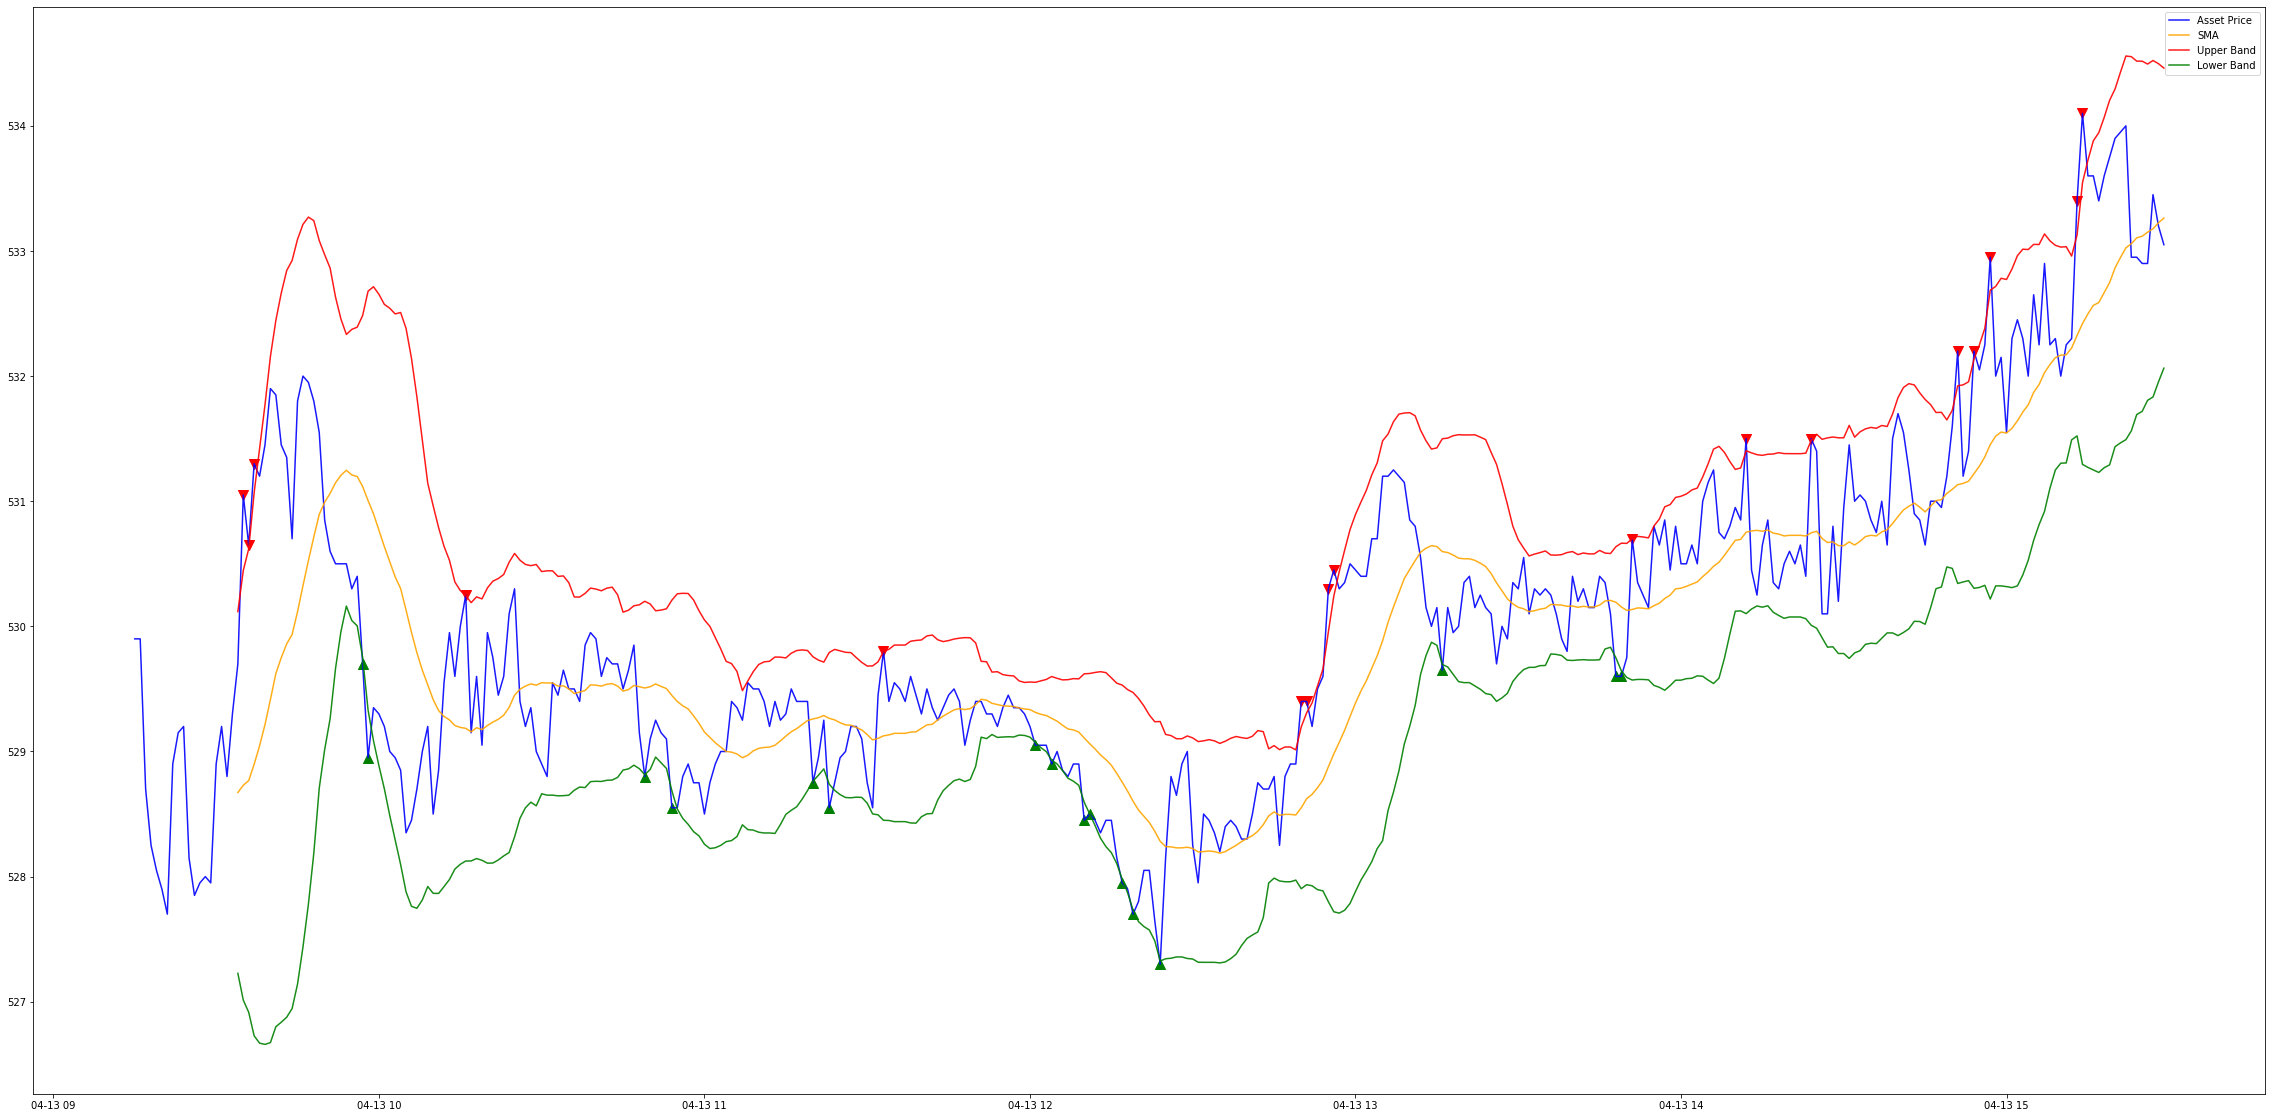

In [464]:
## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Adjusted Close Price, MA-Short (Moving Average Short), MA-Long (Moving Average Long).
plt.plot(df['Close'], label = 'Asset Price', c = 'blue', alpha = 0.9)
plt.plot(df['SMA'], label = 'SMA', c = 'orange', alpha = 0.9)
plt.plot(df['UPPER_BOLLINGER_BAND'], label = 'Upper Band', c = 'red', alpha = 0.9)
plt.plot(df['LOWER_BOLLINGER_BAND'], label = 'Lower Band', c = 'green', alpha = 0.9)

## Adding the marker on buying Index & selling Index.
plt.scatter(df.index[df.BUYING_SIGNAL], df[df.BUYING_SIGNAL]['Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.index[df.SELL_SIGNAL], df[df.SELL_SIGNAL]['Close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()


In [465]:


## Considering if we are trading then we would have an open position or a close position.
## We can store the buy's indexes in a new list buyIndexes = []
## We can store the sell's indexes in a new list sellIndexes = []

## Implementing the trading strategy

buyList = []
sellList = []

openPosition = False

for i in range(len(df)):
    if df['LOWER_BOLLINGER_BAND'][i] > df['Close'][i]:
        if not openPosition:
            buyList.append(i)
            openPosition = True
    elif df['UPPER_BOLLINGER_BAND'][i] < df['Close'][i]:
        if openPosition:
            sellList.append(i)
            openPosition = False

            


In [466]:
buyList

[42, 94, 166, 241]

In [467]:
sellList

[61, 138, 215, 276]

In [468]:

## Now Getting the corresponding buyList from sellList
## Because there may be a case in which buyList has more value than sellList

buyList = buyList[0: len(sellList)]


In [469]:
buyList

[42, 94, 166, 241]

In [470]:
sellList

[61, 138, 215, 276]

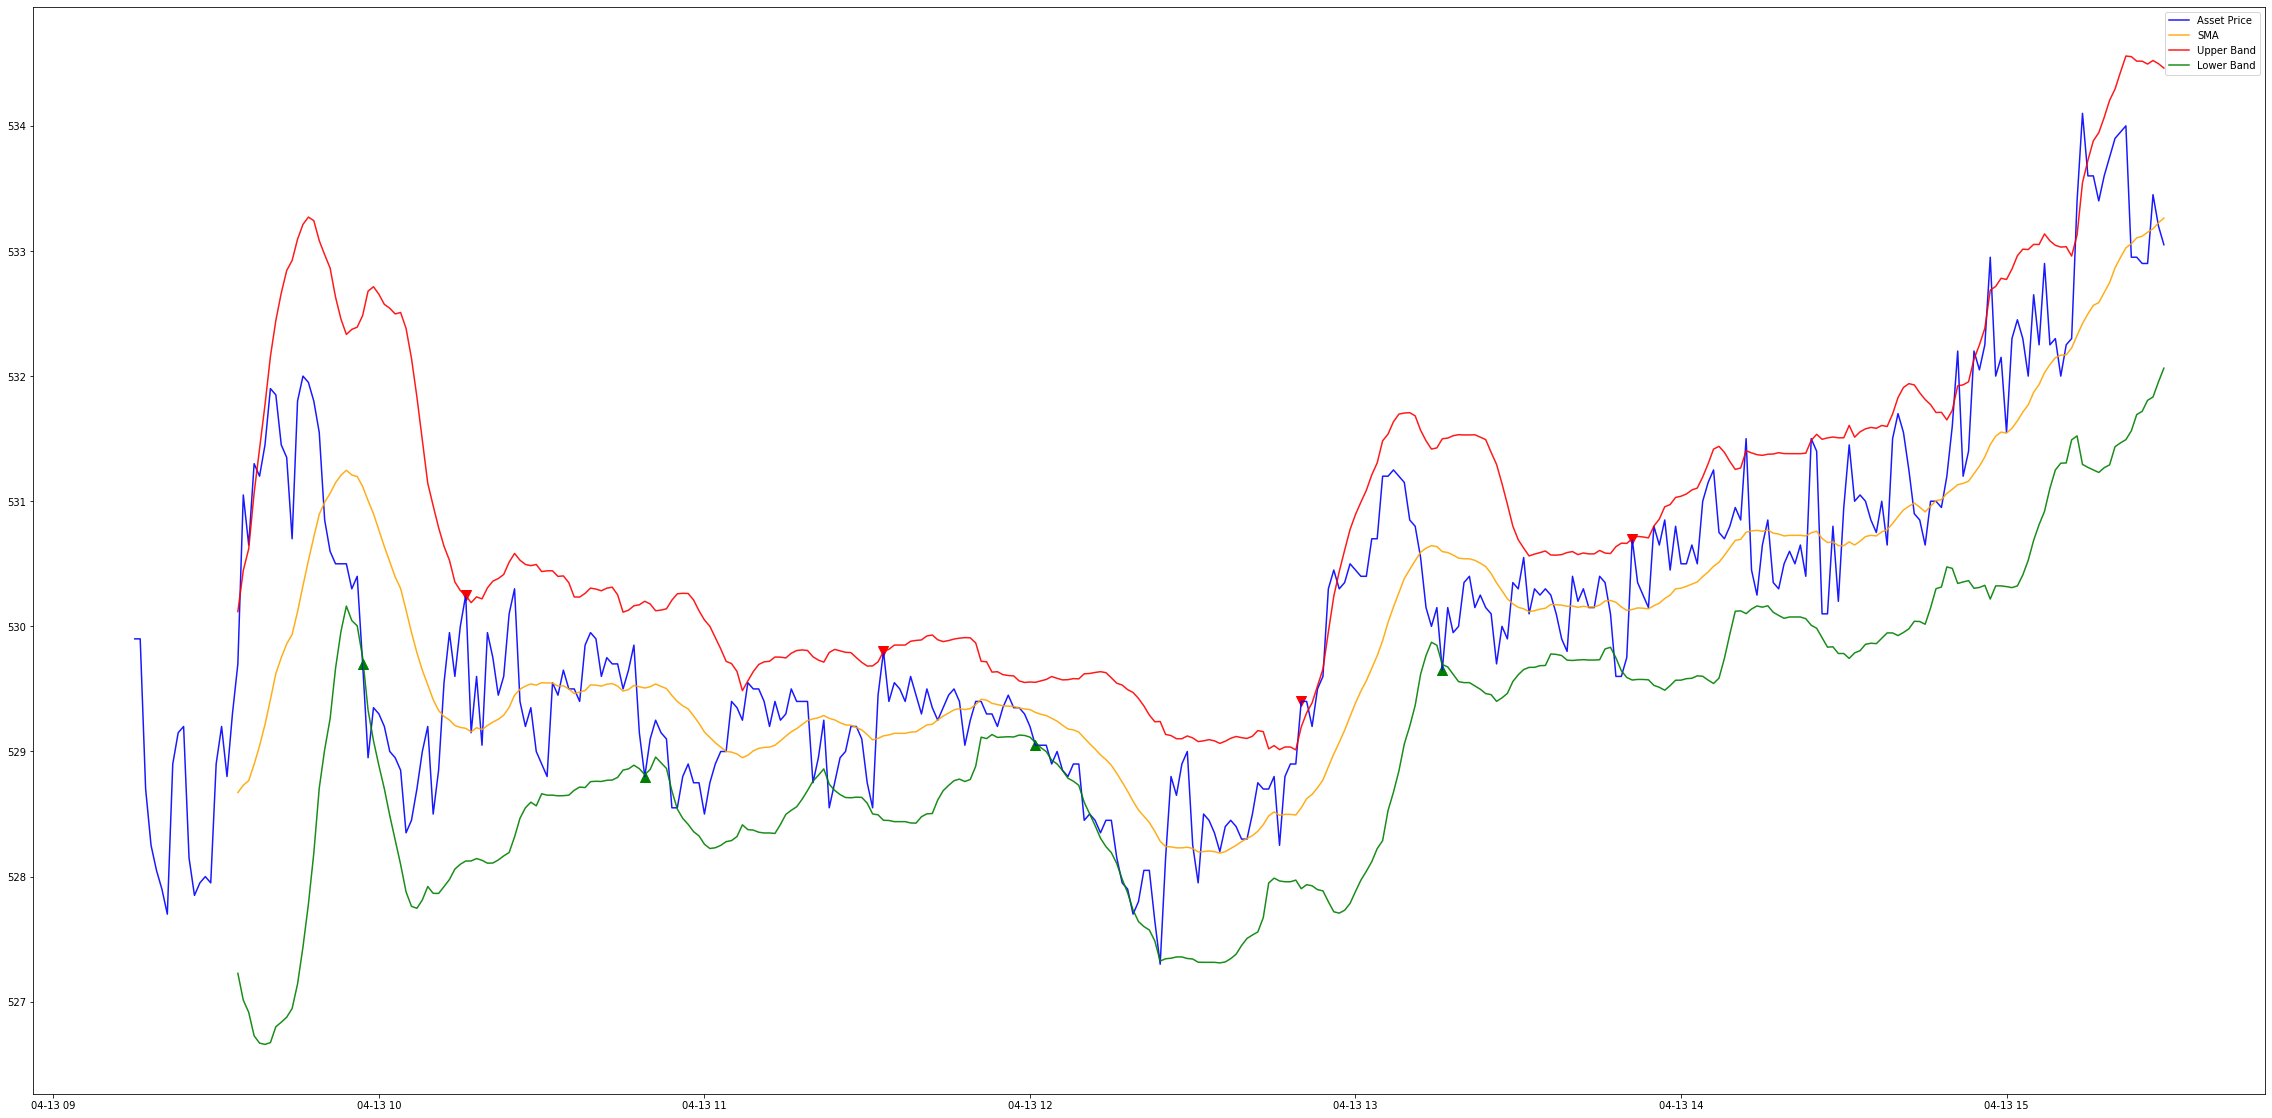

In [471]:

## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Adjusted Close Price, MA-Short (Moving Average Short), MA-Long (Moving Average Long).
plt.plot(df['Close'], label = 'Asset Price', c = 'blue', alpha = 0.9)
plt.plot(df['SMA'], label = 'SMA', c = 'orange', alpha = 0.9)
plt.plot(df['UPPER_BOLLINGER_BAND'], label = 'Upper Band', c = 'red', alpha = 0.9)
plt.plot(df['LOWER_BOLLINGER_BAND'], label = 'Lower Band', c = 'green', alpha = 0.9)

## Adding the marker on buying Index & selling Index.
plt.scatter(df.iloc[buyList].index, df.iloc[buyList]['Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellList].index, df.iloc[sellList]['Close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()



In [472]:


## Calculating the net profits of trade.

mergedDF = pd.concat([df.iloc[buyList]['Close'], df.iloc[sellList]['Close']], axis = 1)
mergedDF.columns = ['Buys', 'Sells']


In [473]:
mergedDF

,Buys,Sells
Datetime,,
2023-04-13 09:57:00+05:30,529.700012,NaN
2023-04-13 10:16:00+05:30,NaN,530.250000
2023-04-13 10:49:00+05:30,528.799988,NaN
2023-04-13 11:33:00+05:30,NaN,529.799988
2023-04-13 12:01:00+05:30,529.049988,NaN
2023-04-13 12:50:00+05:30,NaN,529.400024
2023-04-13 13:16:00+05:30,529.650024,NaN
2023-04-13 13:51:00+05:30,NaN,530.700012


In [474]:

## Calculating the total Buy
## Calculating the total Sell

totalBuy = mergedDF['Buys'].dropna().sum()
totalSell = mergedDF['Sells'].dropna().sum()



In [475]:
totalBuy

2117.2000122070312

In [476]:
totalSell

2120.1500244140625

In [477]:
netProfit = totalSell - totalBuy
netProfitPercentage = ((totalSell - totalBuy) / totalBuy) * 100

In [478]:
netProfit

2.95001220703125

In [479]:
netProfitPercentage

0.13933554647754187